# Q learning on Cart Pole

This exercise will focus on solving the reinforcement learning problem for the Cart Pole environment.

## Description
This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

## Action Space
The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

Action:
* 0: Push cart to the left
* 1: Push cart to the right

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

## Observation Space
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

Num

Observation

Min

Max

* 0: Cart Position $\in [-4.8, 4.8]$
* 1: Cart Velocity $\in [-\infty, \infty]$
* 2: Pole Angle $\in [~ -0.418 rad (-24°), ~ 0.418 rad (24°)]$
* 3: Pole Angular Velocity $\in [-\infty,\infty]$

Note: While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

The cart x-position (index 0) can take values between (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.

The pole angle can be observed between (-.418, .418) radians (or ±24°), but the episode terminates if the pole angle is not in the range (-.2095, .2095) (or ±12°)

## Rewards
Since the goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The threshold for rewards is 475 for v1.

## Starting State
All observations are assigned a uniformly random value in (-0.05, 0.05)

## Episode Termination
The episode terminates if any one of the following occurs:

* Pole Angle is greater than ±12°
* Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
* Episode length is greater than 500 (200 for v0)

1. We'll start by installing the gym libraries needed for simulating the environment

In [1]:
!pip install gym
!pip install gym[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


2. We'll also proceed to the needed imports

In [2]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to measure execution time

import math # needed for calculations

import matplotlib.pyplot as plt # for visualizing

import pygame # has some effect on the rendering

import matplotlib.animation as animation # for making gifs


3. Let's create a variable `env` using the method described in the [documentation](https://www.gymlibrary.ml/environments/classic_control/cart_pole/).

In [3]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


4. take a look at the action space.

In [4]:
env.action_space

Discrete(2)

5. Take a look at the observation space

In [5]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

6. Reset the environment to take a look at a state

In [ ]:
env.reset()
# cart position , cart velocity, pole angle, pole angular velocity

array([-0.01277823,  0.0014233 , -0.04635719, -0.00275678], dtype=float32)

7. Since the environment is continuous in time, we'll make gifs to be able to visualize what the agent is doing. We'll take a few steps to do this:
    * Reset the environment
    * Define an empty list called `arr`
    * Set a variable `done` with value `False`
    * Set a variable `i` with value `0`
    * Start a while loop that will continue as long as `done` is `False` in the loop do:
        * append the visualization of the current state of the environment to the `arr` list (using `env.render(mode='rgb_array')` it should be a numpy array)
        * take a random action to produce the new observation
        * print the new observation

In [ ]:
# returns an initial observation
env.reset()

arr = []
done=False
i = 0
while done == False:
    # env.action_space.sample() produces either 0 (left) or 1 (right).
    arr.append(env.render()[0])
    observation, reward, done, info = env.step(env.action_space.sample())
    i+=1
    print("step", i, observation, reward, done, info)

step 1 [-0.04461305  0.24108876 -0.02446332 -0.33221203] 1.0 False {}
step 2 [-0.03979127  0.04632341 -0.03110757 -0.04734291] 1.0 False {}
step 3 [-0.0388648  -0.14833899 -0.03205442  0.23536527] 1.0 False {}
step 4 [-0.04183158  0.04722592 -0.02734712 -0.06725379] 1.0 False {}
step 5 [-0.04088707  0.24272907 -0.02869219 -0.3684379 ] 1.0 False {}
step 6 [-0.03603248  0.4382467  -0.03606095 -0.670028  ] 1.0 False {}
step 7 [-0.02726755  0.24364418 -0.04946151 -0.3889136 ] 1.0 False {}
step 8 [-0.02239467  0.0492579  -0.05723978 -0.11222654] 1.0 False {}
step 9 [-0.02140951  0.24515134 -0.05948431 -0.4224048 ] 1.0 False {}
step 10 [-0.01650648  0.05092036 -0.06793241 -0.14905167] 1.0 False {}
step 11 [-0.01548807 -0.14316638 -0.07091344  0.12145016] 1.0 False {}
step 12 [-0.0183514  -0.33720446 -0.06848444  0.39094472] 1.0 False {}
step 13 [-0.02509549 -0.531291   -0.06066554  0.6612734 ] 1.0 False {}
step 14 [-0.03572131 -0.7255187  -0.04744008  0.9342542 ] 1.0 False {}
step 15 [-0.050

8. Use the following command to make a gif out of the `arr` list of renderings

In [ ]:
!pip3 install pillow

In [ ]:
"""fig = plt.figure()
i=0
max_ = len(arr)
im = plt.imshow(arr[0], animated=True)
def updatefig(*args):
    global i
    global max_
    if (i<max_-1):
        i += 1
    else:
        i=0
    im.set_array(arr[i])
    return im,
ani = animation.FuncAnimation(fig, updatefig,  blit=True)
ani.save('cart_pole_random.gif', dpi=80, writer='pillow')"""

"fig = plt.figure()\ni=0\nmax_ = len(arr)\nim = plt.imshow(arr[0], animated=True)\ndef updatefig(*args):\n    global i\n    global max_\n    if (i<max_-1):\n        i += 1\n    else:\n        i=0\n    im.set_array(arr[i])\n    return im,\nani = animation.FuncAnimation(fig, updatefig,  blit=True)\nani.save('cart_pole_random.gif', dpi=80, writer='pillow')"

In [ ]:
!pip3 install array2gif

In [ ]:
from array2gif import write_gif
arr_rotated = [np.rot90(arri) for arri in arr]
write_gif(arr_rotated, 'cart_pole_random.gif', fps=6)

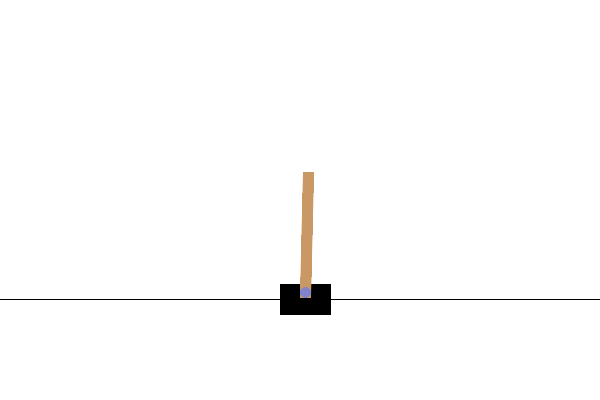

In [ ]:
from IPython.display import Image
Image(open('cart_pole_random.gif','rb').read())

9. Since the observation space is continuous and not discrete, we cannot straightforwardly apply Q-learning. The trick here is to convert this continuous state reinforcement learning problem into a discrete reinforcement learning problem by splitting the range of the different observation metrics into categories. Let's do that.
* What's the legal range of the four different metrics that define a non terminal state?
* For making the discretization function though, do no hesitate to assume larger ranges to avoid any errors

* 0: Cart Position $\in [-4.8, 4.8]$ but valid values are $\in [-2.4, 2.4]$ round it to $[-3, 3]$
* 1: Cart Velocity $\in [-\infty, \infty]$ but based on the observations they should be $\in [-5,5]$
* 2: Pole Angle $\in [~ -0.418 rad (-24°), ~ 0.418 rad (24°)]$ but valid values are $\in [-.2095, .2095]$ let's round it to $[-.3, .3]$
* 3: Pole Angular Velocity $\in [-\infty,\infty]$ but based on the observations they should be $\in [-5,5]$

10. We would like to split all of our state variables into 51 categories, set up an `Observation` object that is a list `[51,51,51,51]`

In [ ]:
Observation = [51, 51, 51, 51]

11. We need to define a function (we'll call it `get_discrete_state`) that turns a continuous state observation into a discrete state observation. The idea is to have 50 categories with category 0 corresponding to the lowest value, and 50 being the highest value. The input from the function should be a state, and the output should be a tuple of integers between 0 and 50.

In [ ]:
# setup a random state, a minimum legal state and maximum legal state
state = env.reset()[0]
state_min = np.array([-3,-5,-0.3,-5])
state_max = np.array([3,5,0.3,5])
state= [-2.9, -4.9, -0.29, -4.9]
def get_discrete_state(state):
    var_range = (state_max - state_min)/50
    discrete_state = state / var_range + [25,25,25,25]
    return tuple(discrete_state.astype(int))
print(state)
print(get_discrete_state(state))
print(get_discrete_state(state_min))
print(get_discrete_state(state_max))

[-2.9, -4.9, -0.29, -4.9]
(0, 0, 0, 0)
(0, 0, 0, 0)
(50, 50, 50, 50)


12. Create the Q table for the discretized reinforcement learning problem, initialize it with zeros. What is its shape?

In [ ]:
q_table = np.zeros(shape=(Observation + [env.action_space.n]))
print(q_table.shape)
type(q_table)

(51, 51, 51, 51, 2)


numpy.ndarray

13. Let's now initialize the values we will need for the Q-learning algorithm to work:
* `LEARNING_RATE` = 0.1
* `DISCOUNT` = 0.95
* `EPISODES` = 60000
* `total` = 0
* `total_reward` = 0
* `prior_reward` = 0
* `epsilon` = 0.1

In [ ]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0
epsilon = 0.1

14. Let's now code the Q-learning algorithm, here are the steps:
* Loop over the number of episodes
    * reset the environment
    * discretize the initial state
    * setup `done=False`
    * setup `episode_reward=0`
    * loop until `done` is `True`
        * setup conditions to implement the $\epsilon-greedy$ policy
        * take a step with the chosen action
        * increment the `episode_reward`
        * discretize the new state
        * if the state is not terminal:
            * update the Q-table the Q-learning update rule
        * replace current discrete state with new discrete state

As sanity check, print the average `episode_reward` calculated over the last 1000 episodes.

In [ ]:
episode_reward_list = [] # to calculate average reward across the episodes

# strting the loop
for episode in range(EPISODES+1):
    discrete_state = get_discrete_state(env.reset()[0]) # discretize the initial state
    done = False # initialize done
    episode_reward = 0 # initialize episode reward

    while not done: # loop until termination of an episode
        if np.random.random() < epsilon: # random action with probability epsilon
            action = env.action_space.sample()
        elif np.max(q_table[discrete_state]) == np.min(q_table[discrete_state]): # if no best action can be found, pick a random action
            action = env.action_space.sample()
        else: # pick greedy action with probability 1-epsilon
            action = np.argmax(q_table[discrete_state])

        new_state, reward, done, _ = env.step(action) #step action to get new states, reward, and the "done" status.

        episode_reward += reward #add the reward

        new_discrete_state = get_discrete_state(new_state) # discretize new state

        if not done: #update q-table
            max_future_q = np.max(q_table[new_discrete_state]) # value of the next best action

            current_q = q_table[discrete_state + (action,)] # value of the current action

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q) # q learning update

            q_table[discrete_state + (action,)] = new_q # set new value in q table

        discrete_state = new_discrete_state # replace current state with new state

    episode_reward_list.append(episode_reward) # add the episode reward to the list

    if episode % 1000 == 0: # calculate the average reward across the last 1000 episodes and reinitialize the reward list
        print("For episode:", episode, "the reward was:", np.mean(episode_reward_list))
        episode_reward_list = []

For episode: 0 the reward was: 14.0
For episode: 1000 the reward was: 25.312
For episode: 2000 the reward was: 26.097
For episode: 3000 the reward was: 25.812
For episode: 4000 the reward was: 29.433
For episode: 5000 the reward was: 32.114
For episode: 6000 the reward was: 34.403
For episode: 7000 the reward was: 41.001
For episode: 8000 the reward was: 46.902
For episode: 9000 the reward was: 53.842
For episode: 10000 the reward was: 64.026
For episode: 11000 the reward was: 64.483
For episode: 12000 the reward was: 74.329
For episode: 13000 the reward was: 85.638
For episode: 14000 the reward was: 86.721
For episode: 15000 the reward was: 85.871
For episode: 16000 the reward was: 97.14
For episode: 17000 the reward was: 121.337
For episode: 18000 the reward was: 106.587
For episode: 19000 the reward was: 108.413
For episode: 20000 the reward was: 101.89
For episode: 21000 the reward was: 109.913
For episode: 22000 the reward was: 111.488
For episode: 23000 the reward was: 124.281
Fo

15. Now that the training is done, it seems as though things turned out really well! Reuse the code to make the animation in order to display the behaviour of the trained agent on the CartPole game.

In [ ]:
# returns an initial observation
observation = env.reset()[0]

arr = []
done=False
i = 0
while done != True:
    arr.append(env.render())
    discrete_state = get_discrete_state(observation)
    action = np.argmax(q_table[discrete_state]) #take greedy action
    observation, reward, done, info,_ = env.step(action)
    i+=1

In [ ]:
"""fig = plt.figure()
i=0
max_ = len(arr)
im = plt.imshow(arr[0], animated=True)
def updatefig(*args):
    global i
    global max_
    if (i<max_-1):
        i += 1
    else:
        i=0
    im.set_array(arr[i])
    return im,
ani = animation.FuncAnimation(fig, updatefig,  blit=True)
ani.save('cart_pole_trained.gif', dpi=80, writer='imagemagick')"""

"fig = plt.figure()\ni=0\nmax_ = len(arr)\nim = plt.imshow(arr[0], animated=True)\ndef updatefig(*args):\n    global i\n    global max_\n    if (i<max_-1):\n        i += 1\n    else:\n        i=0\n    im.set_array(arr[i])\n    return im,\nani = animation.FuncAnimation(fig, updatefig,  blit=True)\nani.save('cart_pole_trained.gif', dpi=80, writer='imagemagick')"

In [ ]:
from array2gif import write_gif
arr_rotated = [np.rot90(arri) for arri in arr]
write_gif(arr_rotated, 'cart_pole_trained.gif', fps=6)

<img src="cart_pole_trained.gif" width="750" align="center">

Congratulations! You have successfully solved a reinforcement learning problem with a continuous state space! The discretization technique is very common when faced with a fairly simple continuous state space like this one! Another approach would be to rely on function approximation in order to map the states and actions to different values in order to pick actions using a function (and this is where Deep Neural Networks may play a significant role!).

NB: Note that discretizing a problem like this to use classic Q-learning is in itself already a function approximation ;)